 # Similar Document Template Matching Algorithm

# Bounding Box Detection and Visualization

In this code, we demonstrate how to detect and visualize bounding boxes around text regions in an image using Python. We utilize the OpenCV library for image manipulation and pytesseract for text recognition.

## Code Explanation

1. **Import Required Libraries**: We import the necessary libraries, including `cv2` for OpenCV, `pytesseract` for text extraction, and `Output` from `pytesseract`.

2. **Load the Image**: We load the image `invoice_0_charspace_1.jpg` into the `img` variable using OpenCV's `cv2.imread()` function.

3. **Text Detection with pytesseract**: We use pytesseract's `image_to_data` function to detect text regions in the image. The result is stored in the dictionary `d`, containing information about each detected text region, such as its coordinates, size, and confidence score.

4. **Print Available Information**: We print the keys of the `d` dictionary to see the available information about each detected text region.

5. **Bounding Box Visualization**: We iterate through the detected text regions and check if their confidence score is greater than 60. If the confidence is above the threshold, we draw a green bounding box around the text region using `cv2.rectangle()`.

6. **Display the Image**: We create an OpenCV window named "output," resize the image for better visualization, and display the image with the bounding boxes using `cv2.imshow()`. The `cv2.waitKey(0)` function waits for a key press before closing the window.

7. **Cleanup**: Finally, we destroy the OpenCV window to release resources.

Please make sure to adjust the image path if necessary and ensure that you have OpenCV and pytesseract properly installed in your environment before running this code.


In [ ]:
import cv2
import pytesseract
from pytesseract import Output

In [2]:
img = cv2.imread("/home/neel/invoice_0_charspace_1.jpg")

In [3]:
d = pytesseract.image_to_data(img, output_type=Output.DICT)
# Print the keys of the resulting dictionary to see the available information
print(d.keys())

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


In [4]:
n_boxes = len(d['text'])
for i in range(n_boxes):
    if float(d['conf'][i]) > 60:  # Check if confidence score is greater than 60
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

        
        
import cv2
cv2.namedWindow("output", cv2.WINDOW_NORMAL)    # Create window with freedom of dimensions
# im = cv2.imread("img.jpg")                    # Read image
imS = cv2.resize(img, (540, 540))                # Resize image
cv2.imshow("output", imS)                       # Show image
cv2.waitKey(0)  z
# cv2.imshow('img', img)
# cv2.waitKey(0)

225

In [ ]:
cv2.destroyWindow('img')

## Getting th Coordinates of Logo

1. **Importing Libraries:** The code starts by importing the necessary libraries.
   - `spacy` is imported for natural language processing tasks, although it's not used in this code.
   - `cv2` (OpenCV) is imported for image processing.
   - `numpy` is imported for numerical operations.

2. **Loading Pretrained YOLO Model:** The code loads a pretrained YOLO (You Only Look Once) model for object detection. YOLO is a deep learning model used for object detection tasks.

3. **Loading Class Names:** It reads a file named "coco.names" that contains the class names used in the YOLO model. These class names include common objects and items that can be detected by the model.

4. **Loading and Preprocessing the Image:** The code loads an image named "Original_01_page-0001.jpg" and preprocesses it for YOLO input. It resizes the image to 416x416 pixels, scales pixel values to a range between 0 and 1, and performs color channel swapping.

5. **Setting Input for the YOLO Model:** The preprocessed image is set as the input to the YOLO model.

6. **Getting Detections:** The code forward-propagates the image through the YOLO model to obtain object detections. The `net.getUnconnectedOutLayersNames()` method retrieves the output layer names of the model.

7. **Looping Over Detections:** The code then loops through the detected objects in the image.
   - It extracts scores, class IDs, and confidence values for each detected object.
   - If the confidence of a detected object is greater than 0.5, it assumes the object is a logo.

8. **Extracting Logo Coordinates:** For each detected logo, the code extracts its coordinates and dimensions.
   - `center_x` and `center_y` are the coordinates of the center of the logo.
   - `width` and `height` represent the dimensions of the bounding box around the logo.
   - `x`, `y`, `x2`, and `y2` calculate the coordinates of the top-left and bottom-right corners of the bounding box.

9. **Cropping the Logo Region:** It crops the region of the image containing the detected logo using the calculated coordinates.

10. **Checking Logo Region:** It checks if the cropped logo region contains non-black and non-white pixels, assuming an RGB image. This step helps verify if the region genuinely contains a logo.

11. **Printing Information:** If the region is considered a logo, the code prints the confidence score and the coordinates of the top-left corner of the logo bounding box.

Overall, this code snippet uses a pretrained YOLO model to detect logos in an image, extracts their coordinates, and checks if the region truly contains a logo based on pixel color. Detected logos meeting the confidence threshold are printed with their coordinates.


In [3]:
import spacy
# import en_core_web_sm
# Load the English pre-trained model with NER
nlp = spacy.load('en_core_web_sm')

/home/neel/anaconda3/lib/python3.8/site-packages/torch/cuda/__init__.py:546: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [1]:
 !python3 -m spacy download en_core_web_sm

/home/neel/anaconda3/lib/python3.8/site-packages/torch/cuda/__init__.py:546: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 4.6 MB/s eta 0:00:00m eta 0:00:010:00:01m
DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
  Attempting uninstall: en-core-web-sm
    Found existing installation: en-core-web-sm 2.2.0
    Uninstalling en-core-web-sm-2.2.0:
      Successfully uninstalled en-core-web-sm-2.2.0
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [1]:
import spacy

/home/neel/anaconda3/lib/python3.8/site-packages/torch/cuda/__init__.py:546: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [2]:
nlp = spacy.load('en_core_web_sm')


In [3]:
with open('Invoice2.pdf', 'r', encoding='utf-8',
                 errors='ignore') as f:
    text = f.read()

# Apply the NER model to the invoice text
doc = nlp(text)

In [4]:
print(doc)

%PDF-1.4
1 0 obj
<<
/Title ( D o c u m e n t)
/Creator ( w k h t m l t o p d f   0 . 1 2 . 6 . 1)
/Producer ( Q t   4 . 8 . 7)
/CreationDate (D:20230911190846Z)
>>
endobj
3 0 obj
<<
/Type /ExtGState
/SA true
/SM 0.02
/ca 1.0
/CA 1.0
/AIS false
/SMask /None>>
endobj
4 0 obj
[/Pattern /DeviceRGB]
endobj
8 0 obj
<<
/Type /Catalog
/Pages 2 0 R
>>
endobj
5 0 obj
<<
/Type /Page
/Parent 2 0 R
/Contents 9 0 R
/Resources 11 0 R
/Annots 12 0 R
/MediaBox [0 0 612 792]
>>
endobj
11 0 obj
<<
/ColorSpace <<
/PCSp 4 0 R
/CSp /DeviceRGB
/CSpg /DeviceGray
>>
/ExtGState <<
/GSa 3 0 R
>>
/Pattern <<
>>
/Font <<
/F6 6 0 R
/F7 7 0 R
>>
/XObject <<
>>
>>
endobj
12 0 obj
[ ]
endobj
9 0 obj
<<
/Length 10 0 R
/Filter /FlateDecode
>>
stream
x[Ko6W
,
N\FP6-be5Mveo$$5"9qtr;Wvv\U6/53d=VjSm}>VX_>i5ޔoGiTYNֿ>VWI
%`LRX{H5|-Sj9$}!jsZvU`-T.~<~f{u㇖}<zƱtoPWxb~&!% 8/wiCپ(qw=c~?؟y:Ij0l{ Tl+4[en߳/l?pKIQ6\Q+I"kmR"h<GG@w6itsa`FhkbDRdH\.KIx9)|ҤoD.]Z4;E9]HX@5\ghR~Qml%	D>Qkpn%7

In [5]:
import cv2
import numpy as np

# Load YOLO model
net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")

# Load class names
with open("coco.names", "r") as f:
    classes = f.read().strip().split("\n")

# Load image
image = cv2.imread("Original_01_page-0001.jpg")
blob = cv2.dnn.blobFromImage(image, 1/255.0, (416, 416), swapRB=True, crop=False)

# Set the input
net.setInput(blob)

# Get the detections
layer_names = net.getUnconnectedOutLayersNames()
detections = net.forward(layer_names)

# Loop over the detections
for detection in detections:
    for obj in detection:
        scores = obj[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
#         
        if confidence > 0.5 :  # Assuming "logo" is the class name for the logo
            label = classes[class_id]

            # Get the coordinates of the bounding box
            center_x = int(obj[0] * image.shape[1])
            center_y = int(obj[1] * image.shape[0])
            width = int(obj[2] * image.shape[1])
            height = int(obj[3] * image.shape[0])

            # Calculate the coordinates of the top-left and bottom-right corners
            x = int(center_x - width / 2)
            y = int(center_y - height / 2)
            x2 = x + width
            y2 = y + height

            # Crop the region containing the detected logo
            logo_region = image[y:y2, x:x2]

            # Check if the region contains non-black/non-white pixels (assuming RGB image)
            is_logo = np.any((logo_region > [0, 0, 0]) & (logo_region < [255, 255, 255]))
           
            if is_logo:
                print(f"Confidence: {confidence}")
                print(f"Coordinates: x={x}, y={y}")

Confidence: 0.6662297248840332
Coordinates: x=33, y=71


# Detecting Fraudulent Invoices Based on Text and Image Similarity

The provided code aims to determine whether two invoice documents (in either image or PDF format) are potentially fraudulent or not based on their similarity scores. It combines text and image analysis to make this determination.

## Text and PDF Processing

- The code uses the PyMuPDF library (imported as `fitz`) to extract text from PDF files. The `extract_text_from_pdf` function reads a PDF file and concatenates the text content from all its pages.

- The `extract_images_from_pdf` function extracts images from a PDF file using PyMuPDF. It collects image data from all the pages and returns them as a list of image data.

## Text Similarity Calculation

- The `compute_similarity` function calculates the TF-IDF (Term Frequency-Inverse Document Frequency) similarity score between two text documents. It first converts the text into a numerical vector representation using TF-IDF and then computes the cosine similarity between these vectors.

## Image Similarity Calculation

- The `compare_images` function compares two images using the structural similarity index (SSIM). It first decodes the image data using OpenCV, and if the images have the same shape, it calculates the similarity score using the template matching technique.

## Detecting Fraud

- The `detect_fraud` function uses the previously defined functions to analyze the text and image content of two PDF files. It calculates the text similarity and image similarity scores. However, it seems that the image similarity calculation is currently commented out, and the image similarity is set to 0 in the provided code.

- The `check_similarity_and_fraud` function calls `detect_fraud` to obtain the text and image similarity scores for two PDF files and then checks if both scores are above a threshold of 0.7. If both scores are sufficiently high, it concludes that the documents are similar and potentially fraudulent.

## Example Usage

- The code provides an example usage where two PDF file paths are specified (`pdf1_path` and `pdf2_path`). It then calls `check_similarity_and_fraud` to determine whether these two documents are similar and potentially fraudulent based on the text and image analysis.

- Finally, the code prints the result, which includes the similarity scores and a fraudulent indicator.

Please note that in the provided code, the image similarity calculation is commented out, and the image similarity is always set to 0. You may need to uncomment and adapt the image similarity calculation to suit your specific needs. Additionally, you should adjust the file paths for the PDF documents you want to analyze.


In [6]:
import fitz  # PyMuPDF for PDF text extraction
import cv2   # OpenCV for image processing
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import DBSCAN
import difflib

# Function to extract text from a PDF file
def extract_text_from_pdf(pdf_file):
    doc = fitz.open(pdf_file)
    text = ""
    for page_num in range(len(doc)):
        page = doc[page_num]
        text += page.get_text()
    return text

# Function to extract images from a PDF file
def extract_images_from_pdf(pdf_file):
    doc = fitz.open(pdf_file)
    images = []
    for page_num in range(len(doc)):
        page = doc[page_num]
        xref_list = page.get_images(full=True)
        for xref in xref_list:
            base_image = doc.extract_image(xref[0])
            image_data = base_image["image"]
            images.append(image_data)
    return images

# Function to compute TF-IDF similarity between two texts
def compute_similarity(text1, text2):
    tfidf_vectorizer = TfidfVectorizer()
    tfidf_matrix = tfidf_vectorizer.fit_transform([text1, text2])
    similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)
    return similarity_matrix[0][1]

# Function to compare images using structural similarity index (SSIM)
def compare_images(image1, image2):
    image1 = cv2.imdecode(np.frombuffer(image1, np.uint8), -1)
    image2 = cv2.imdecode(np.frombuffer(image2, np.uint8), -1)
    if image1.shape != image2.shape:
        return 0.0
    return cv2.matchTemplate(image1, image2, cv2.TM_CCOEFF_NORMED)[0][0]

# Function to detect fraud based on text and image similarities
def detect_fraud(pdf_file1, pdf_file2):
    text1 = extract_text_from_pdf(pdf_file1)
    text2 = extract_text_from_pdf(pdf_file2)

    images1 = extract_images_from_pdf(pdf1_path)
    images2 = extract_images_from_pdf(pdf2_path)

    text_similarity = compute_similarity(text1, text2)

    # image_similarity_scores = []
    # for image1 in images1:
    #     for image2 in images2:
    #         similarity_score = compare_images(image1, image2)
    #         image_similarity_scores.append(similarity_score)

    # image_similarity = max(image_similarity_scores)
    image_similarity = 0
    return text_similarity, image_similarity

# Function to check if documents are similar and potentially fraudulent
def check_similarity_and_fraud(pdf_file1, pdf_file2):
    text_similarity, image_similarity = detect_fraud(pdf_file1, pdf_file2)

    if text_similarity > 0.7 and image_similarity > 0.7:
        return "Similarity Score: {:.2f}, Fraudulent: No".format(text_similarity), True
    else:
        return "Similarity Score: {:.2f}, Fraudulent: Yes".format(text_similarity), False

# Example usage
pdf1_path = "/home/neel/Invoice1.pdf"  # Replace with the path to the first PDF
pdf2_path = "/home/neel/Invoice2.pdf"  # Replace with the path to the second PDF

result, is_fraudulent = check_similarity_and_fraud(pdf1_path, pdf2_path)
print(result)

Similarity Score: 0.59, Fraudulent: Yes


# Clustering PDF Documents Based on Image Category

In this Jupyter Notebook code, we are performing clustering on a collection of PDF documents based on the content of the documents, particularly focusing on the images within them. The goal is to group similar PDF documents together using K-Means clustering. Below is a step-by-step explanation of the code:

## Importing Libraries
We begin by importing the necessary Python libraries:

```python
import fitz
import cv2
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

    fitz: A library for working with PDF documents.
    cv2: OpenCV for image processing.
    numpy: For numerical operations.
    TfidfVectorizer and cosine_similarity: Used for computing TF-IDF similarity between texts.
    KMeans: A clustering algorithm for grouping documents.
    StandardScaler and make_pipeline: For data preprocessing.
    matplotlib.pyplot: For creating data visualizations.
    PCA: Principal Component Analysis for dimensionality reduction.
```
## Functions for Text and Image Extraction
extract_text_from_pdf(pdf_file)

This function extracts text content from a PDF file using the PyMuPDF library (fitz).
extract_images_from_pdf(pdf_file)

This function extracts images from a PDF file. It iterates through the pages of the PDF and collects image data.
Functions for Similarity Measurement
compute_similarity(text1, text2)

This function computes the TF-IDF similarity between two text documents. It uses a TF-IDF vectorizer and cosine similarity.
compare_images(image1, image2)

This function compares two images using the structural similarity index (SSIM). It decodes images and calculates a similarity score.
Loading PDF Files

We define a base path for the PDF files and generate file paths for a collection of PDF documents. In this example, it's generating file paths for 50 PDFs.
Computing Text and Image Similarity

We create two similarity matrices: text_similarity_matrix and image_similarity_matrix. These matrices store similarity scores between PDF documents based on their text content and images, respectively.

    For each PDF document, we extract its text and images.
    We calculate the text similarity between all pairs of documents.
    We calculate image similarity scores for all pairs of documents using the compare_images function. If a document has no images, its image similarity score is set to 0.

## Combining Similarity Scores

We combine the text and image similarity scores into a single combined_similarity_matrix. This matrix contains both text and image similarity information.
Normalizing the Combined Similarity Matrix

We standardize (normalize) the combined similarity matrix to make it suitable for K-Means clustering.
Applying K-Means Clustering

We apply K-Means clustering to the normalized similarity matrix. The number of clusters (num_clusters) is predefined as 5 in this example. Adjust this number according to your specific dataset and requirements.
Printing Clusters

We print the PDF files that belong to each cluster, helping us understand how the documents are grouped.
Plotting Results

Finally, we use Principal Component Analysis (PCA) to reduce the dimensions of the data for visualization purposes. We then create a scatter plot to visualize the clustering results in a 2D space, coloring the points based on their cluster assignments.

The code provides a way to analyze and group PDF documents based on both text and image content, which can be useful in various document categorization and clustering tasks.

Cluster 1:
Samples of electronic invoices/Dataset with valid information/invoice_1.pdf
Samples of electronic invoices/Dataset with valid information/invoice_6.pdf
Samples of electronic invoices/Dataset with valid information/invoice_7.pdf
Samples of electronic invoices/Dataset with valid information/invoice_10.pdf
Samples of electronic invoices/Dataset with valid information/invoice_13.pdf
Samples of electronic invoices/Dataset with valid information/invoice_28.pdf
Samples of electronic invoices/Dataset with valid information/invoice_36.pdf
Samples of electronic invoices/Dataset with valid information/invoice_41.pdf
Samples of electronic invoices/Dataset with valid information/invoice_45.pdf
Samples of electronic invoices/Dataset with valid information/invoice_48.pdf
Samples of electronic invoices/Dataset with valid information/invoice_49.pdf
Cluster 2:
Samples of electronic invoices/Dataset with valid information/invoice_3.pdf
Samples of electronic invoices/Dataset with valid informat

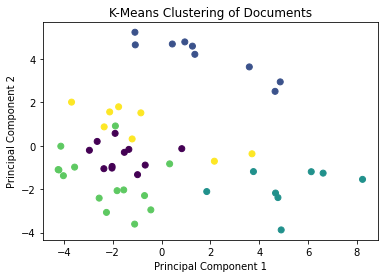

In [1]:
import fitz
import cv2
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
# Function to extract text from a PDF file
def extract_text_from_pdf(pdf_file):
    doc = fitz.open(pdf_file)
    text = ""
    for page_num in range(len(doc)):
        page = doc[page_num]
        text += page.get_text()
    return text

# Function to extract images from a PDF file
def extract_images_from_pdf(pdf_file):
    doc = fitz.open(pdf_file)
    images = []
    for page_num in range(len(doc)):
        page = doc[page_num]
        xref_list = page.get_images(full=True)
        for xref in xref_list:
            base_image = doc.extract_image(xref[0])
            image_data = base_image["image"]
            images.append(image_data)
    return images

# Function to compute TF-IDF similarity between two texts
def compute_similarity(text1, text2):
    tfidf_vectorizer = TfidfVectorizer()
    tfidf_matrix = tfidf_vectorizer.fit_transform([text1, text2])
    similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)
    return similarity_matrix[0][1]

# Function to compare images using structural similarity index (SSIM)
def compare_images(image1, image2):
    image1 = cv2.imdecode(np.frombuffer(image1, np.uint8), -1)
    image2 = cv2.imdecode(np.frombuffer(image2, np.uint8), -1)
    if image1.shape != image2.shape:
        return 0.0
    return cv2.matchTemplate(image1, image2, cv2.TM_CCOEFF_NORMED)[0][0]

# Load your dataset of PDF files here
# The base path for the PDF files
base_path = 'Samples of electronic invoices/Dataset with valid information/invoice_'

# List to store the file paths for 500 images
pdf_files = []

# Loop to generate file paths for 500 images
for i in range(50):
    pdf_file_path = f'{base_path}{i}.pdf'
    pdf_files.append(pdf_file_path)

# Create feature vectors for text and image similarity
text_similarity_matrix = np.zeros((len(pdf_files), len(pdf_files)))
image_similarity_matrix = np.zeros((len(pdf_files), len(pdf_files)))

for i, pdf_file1 in enumerate(pdf_files):
    text1 = extract_text_from_pdf(pdf_file1)
    images1 = extract_images_from_pdf(pdf_file1)

    for j, pdf_file2 in enumerate(pdf_files):
        text2 = extract_text_from_pdf(pdf_file2)
        images2 = extract_images_from_pdf(pdf_file2)

        text_similarity_matrix[i][j] = compute_similarity(text1, text2)
        if(len(images1) == 0 | len(images2) == 0):
            image_similarity_matrix[i][j] = 0; 
        
        else:
            image_similarity_scores = []
            for image1 in images1:
                for image2 in images2:
                    similarity_score = compare_images(image1, image2)
                    image_similarity_scores.append(similarity_score)
            image_similarity_matrix[i][j] = max(image_similarity_scores)
        

# Combine text and image similarity scores
combined_similarity_matrix = text_similarity_matrix + image_similarity_matrix

# Normalize the combined similarity matrix
scaler = StandardScaler()
normalized_combined_similarity_matrix = scaler.fit_transform(combined_similarity_matrix)

# Apply K-Means clustering
num_clusters = 5  # You can adjust this based on your dataset and requirements
kmeans = KMeans(n_clusters=num_clusters)
clusters = kmeans.fit_predict(normalized_combined_similarity_matrix)

# Print clusters
for i in range(num_clusters):
    print(f"Cluster {i + 1}:")
    for j, pdf_file in enumerate(pdf_files):
        if clusters[j] == i:
            print(pdf_file)

# Plot the results (for visualization purposes, using the first two dimensions)
pca = PCA(n_components=3)
reduced_features = pca.fit_transform(normalized_combined_similarity_matrix)

plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=clusters, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering of Documents')
plt.show()